In [3]:
import pandas as pd
import ExperimentData

from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
loader = ExperimentData.Loader()

In [91]:
# This will be replaced by an api call soon enough.
sessions_type1 = ['vhmb74qv']
sessions_type3 = ['5ydhsfg6', '89ykytnu', 'ef0hzbwg'] #Priming
sessions_type4 = ['3k2emuiz', '20pmmmna'] #No Priming

def getDemographics(sessions):
    
    def filterSession(df, sessions):
        mask = df.index.get_level_values('session.code').isin(sessions)
        return df[mask]
    
    cols = ['session.code', 
            'participant.code', 
            'player.age',
            'player.sex',
            'player.country_reside',
            'player.highest_degree',
            'player.device_type',
            'player.membership_duration',
            ]
    
    age_converter = dict(
            [(1, "0-17 years old"),
            (2, "18-30 years old"),
            (3, "31-40 years old"),
            (4, "41-60 years old"),
            (5, "61-80 years old"),
            (6, "greater than 80 years old")
            ]
    )
    
    membership_duration_converter = dict([
            [1, "less than 1 month"],
            [2, "1 month - 6 months"],
            [3, "6 months - 1 year"],
            [4, "greater than 1 year"],
    ])

    Demographics = loader.getDemographicSurvey()[cols].set_index(['session.code', 'participant.code'])
    Demographics.columns = [x.split('.')[-1] for x in Demographics.columns if x.startswith('player.')]
    Demographics = filterSession(Demographics, sessions).dropna(how='all')
    
    Demographics['age'] = Demographics['age'].apply(lambda x: age_converter[int(x)])
    Demographics['membership_duration'] = Demographics['membership_duration'].apply(lambda x: membership_duration_converter[int(x)])
    
    #Clean labels...
    Demographics = Demographics.applymap(lambda x: x.split(' (')[0])
    
    return Demographics

In [92]:
demographics_base = getDemographics(sessions_type1 + sessions_type3 + sessions_type4)

# Base Demographics -- User Reported

In [93]:
print "We have {} users to date.".format(len(demographics_base))

We have 49 users to date.


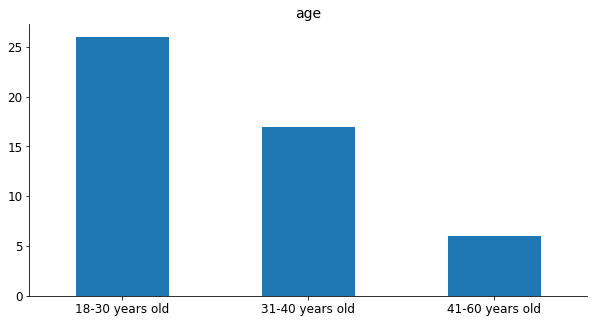

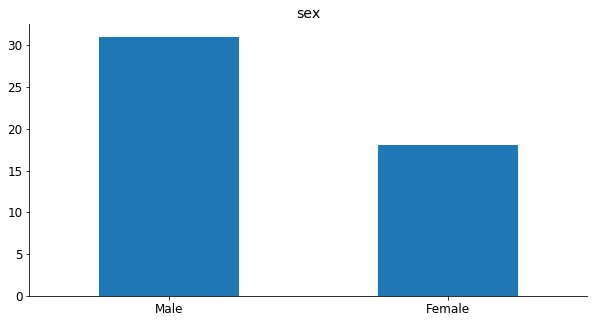

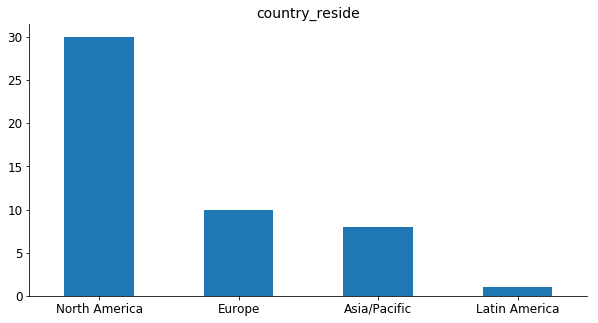

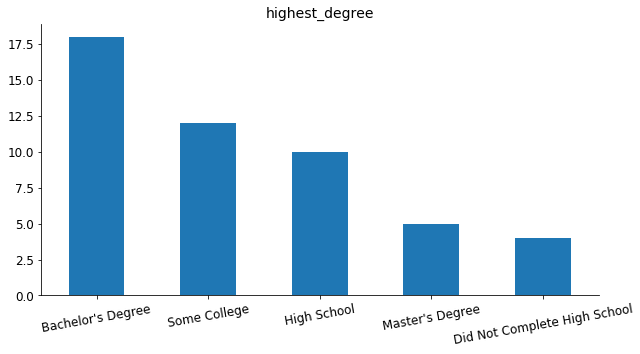

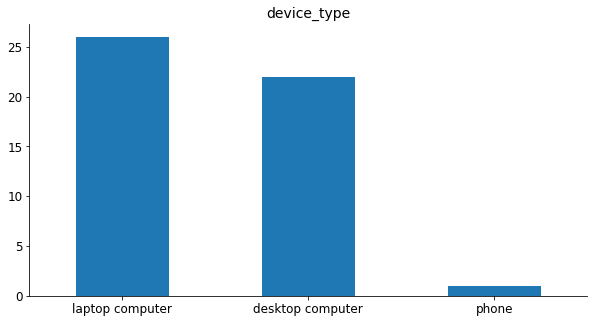

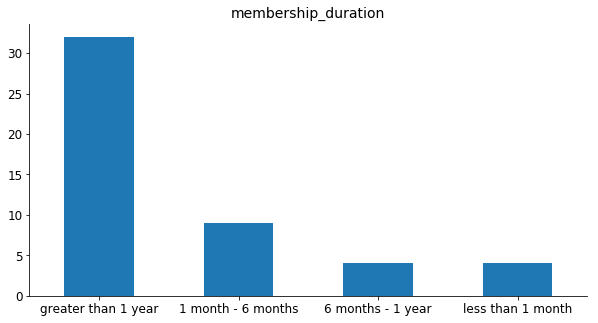

In [101]:
for col in demographics_base:
    fig, ax = plt.subplots(figsize=(10,5))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    rot = 0
    if col in ['highest_degree']:
        rot = 10
    
    demographics_base[col].value_counts().plot.bar(rot=rot, fontsize=12)
    plt.title(col, fontsize = 14)
    plt.savefig('output/demographic_{}.png'.format(col))